In [0]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [5]:
usedu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [6]:
usedu_df.nunique()

PRIMARY_KEY                     1487
STATE                             80
YEAR                              26
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1261
GRADES_KG_G                     1348
GRADES_4_G                      1340
GRADES_8_G                      1347
GRADES_12_G                     1342
GRADES_1_8_G                    1360
GRADES_9_12_G                   1358
GRADES_ALL_G                    1318
AVG_MATH_4_SCORE                 535
AVG_MATH_8_SCORE                 531
AVG_READING_4_SCORE              532
AVG_READING_8_SCORE              497
dtype: int64

In [7]:
#Fraction of missing value for each variable
usedu_df.isnull().sum() / usedu_df.isnull().count() 

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [0]:
usedu2_df = usedu_df.copy()

fill_list = [
             "ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]


for col in fill_list:
  usedu2_df.loc[:, col] = usedu2_df.loc[:, col].fillna(usedu2_df.loc[:,col].mean())

In [0]:
usedu3_df = usedu_df.copy()
years = usedu3_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        usedu3_df.loc[usedu3_df["YEAR"] == year,col] = usedu3_df.loc[usedu3_df["YEAR"] == year,col].fillna(
            usedu3_df[usedu3_df["YEAR"] == year][col].mean()
        )

In [0]:
#Use Interpolation method
usedu4_df = usedu_df.copy()

for col in fill_list:
    usedu4_df.loc[:, col] = usedu4_df.loc[:, col].interpolate()

In [15]:
#Compare 2nd, 3rd, and 4th questions.

for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([usedu_df[col], usedu2_df[col],
                     usedu3_df[col], usedu4_df[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

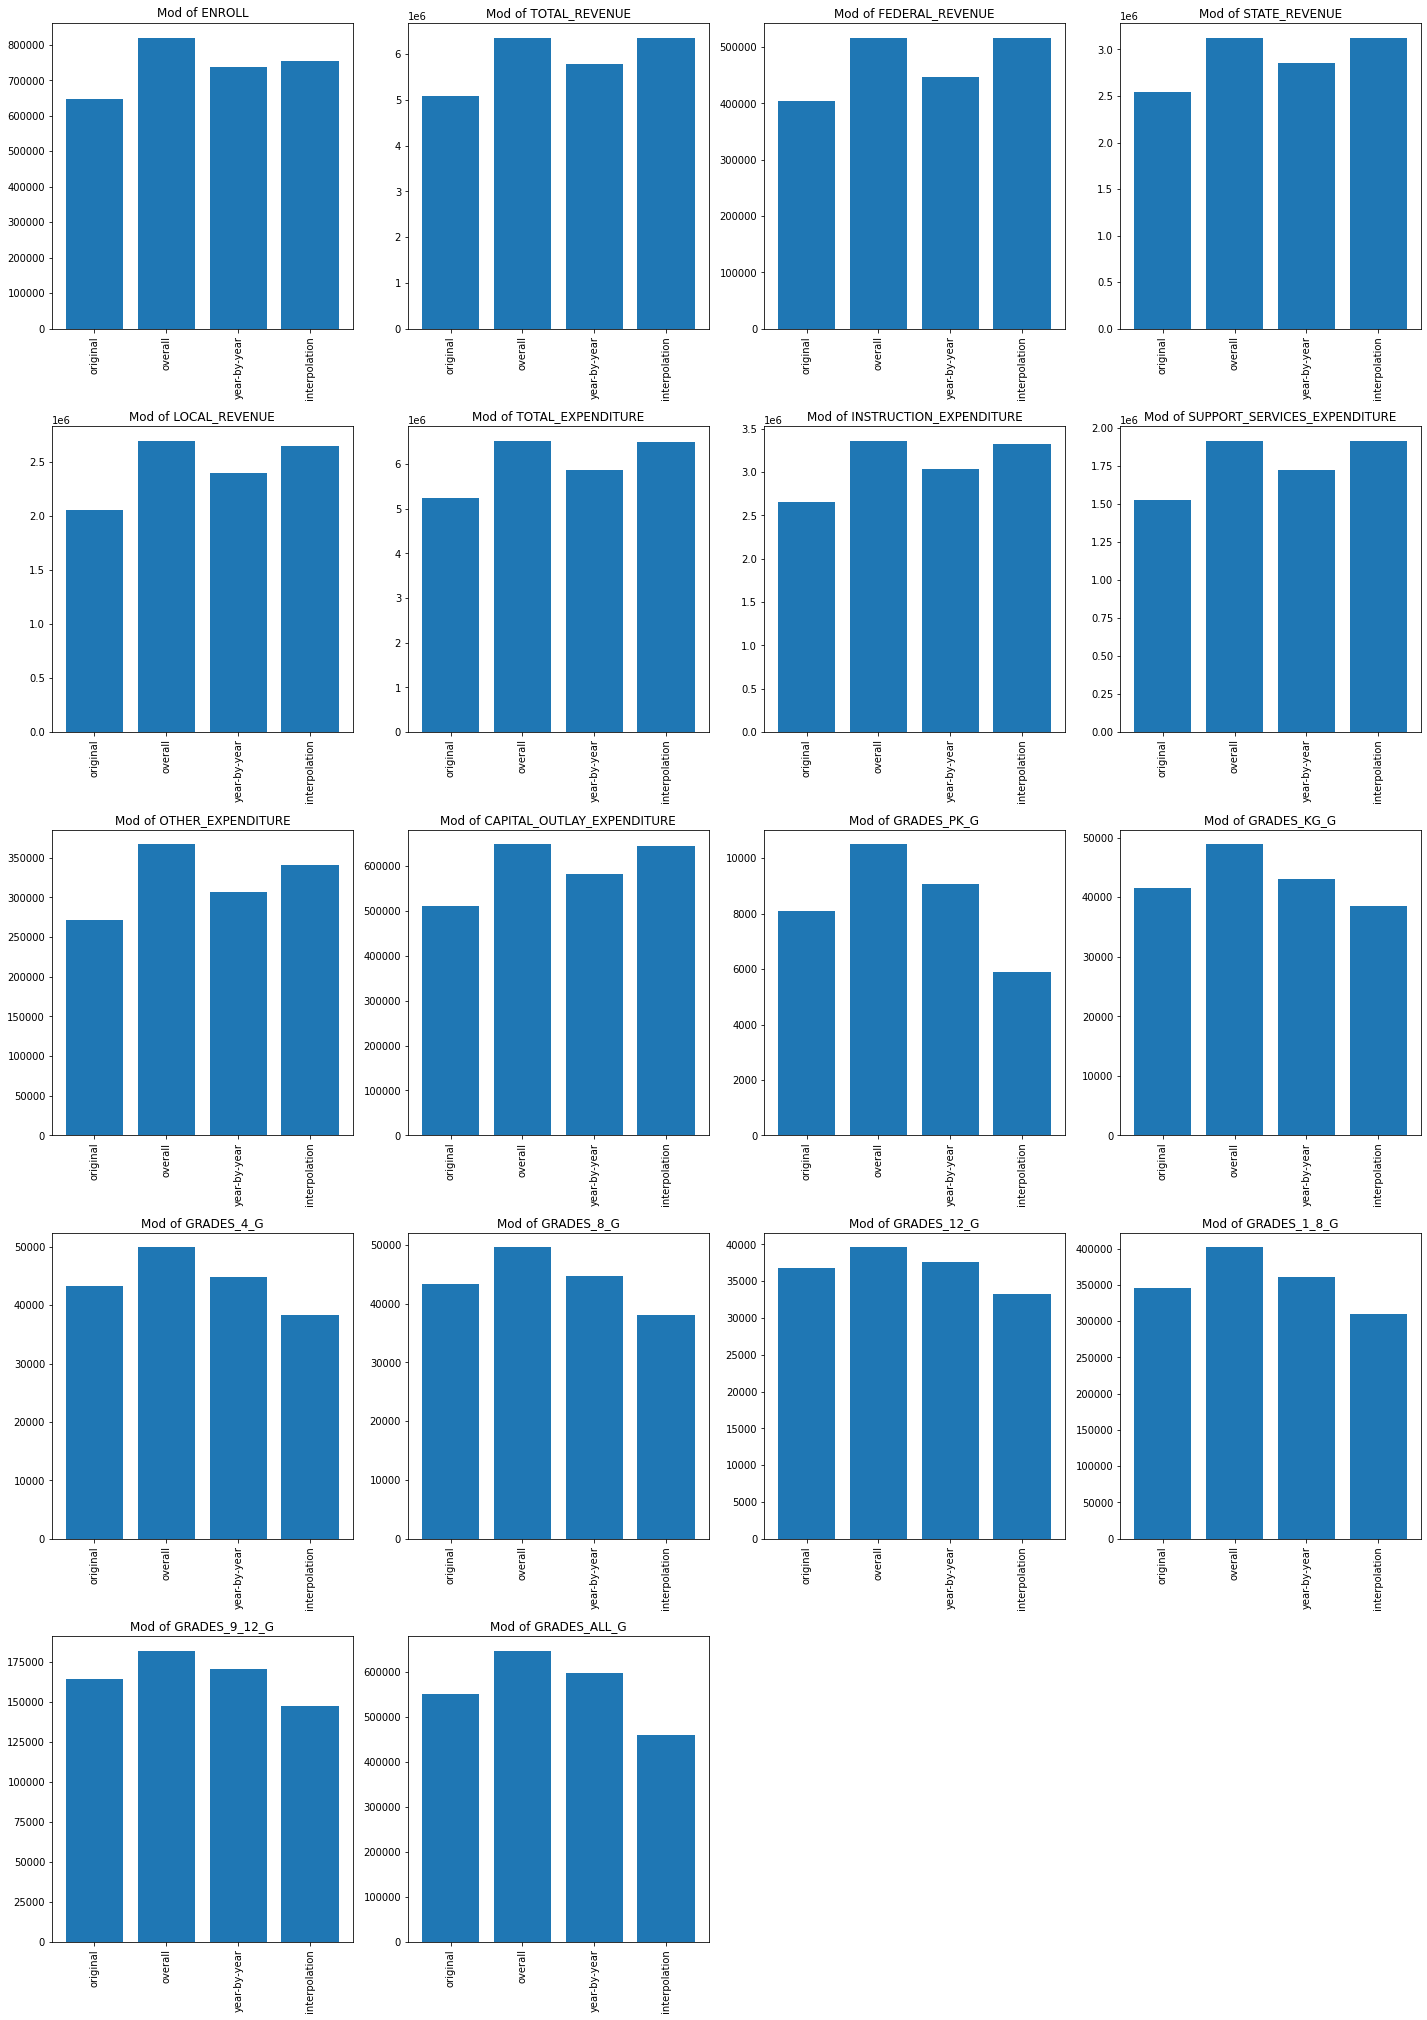

In [18]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([usedu_df[col], usedu2_df[col],
                     usedu3_df[col], usedu4_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()